<a href="https://colab.research.google.com/github/zmactag/Chess-Dataset-Analysis/blob/main/Capstone_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

## Packages and Connecting Drive

In [ ]:
# Packages

import numpy as np
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

import spacy
from spacy.matcher import Matcher
from spacy.language import Language
from spacy.tokens import doc
from spacy.pipeline import EntityRuler

!python -m spacy download en_core_web_md

from sklearn.feature_extraction.text import TfidfVectorizer

2023-12-28 00:23:48.264435: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 00:23:48.264501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 00:23:48.265857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 00:23:49.508908: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## File Pathway Section Objectives

- First cleaned to be processed by spaCy tokenization

### 1. Tokens
- Extracted
- Search through/print all tokens
- Search for specific token
- Find all files with specific token
- Word Vector Similarity Search -> finding token most similar to user input


### 2. TF-IDF Scoring
- All tokens scored using TF-IDF
- Used for giving model most important words and for NER
- Visualizations and NMF

### 3. NER/Entities
- Custom spaCy NER to find important entities
- Search through/print all files and their entities
- Search via specific entity
- Find all files with certain entity

### 4. Way to organize this all...

### Function to find all Tokens
- cleans file pathways
- tokenizes all file pathways
- prints out all tokens that are not punctuation
- can also add stop_words to remove words that are very common or unimportant

In [ ]:
# Finding all Tokens

nlp = spacy.load("en_core_web_md")

def clean_file_path(file_path):
    cleaned_path = file_path.replace('/', '. ')
    return cleaned_path
# replaces '/' with a '. ' for nlp processing (does not like non-sentence structure of file pathways)


def tokenize_file_path(file_path):
    cleaned_path = clean_file_path(file_path)
    doc = nlp(cleaned_path)
    important_tokens = [token.text for token in doc if not token.is_punct]
    return important_tokens
# clean + tokenize file paths while ignoring punctuation


def process_directory(directory_path):

    all_important_tokens = []

    for root, dirs, files in os.walk(directory_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)


            important_tokens = tokenize_file_path(file_path)


            all_important_tokens.extend(important_tokens)

    return all_important_tokens


directory_path = '/content/drive/MyDrive/20231127/'
all_important_tokens = process_directory(directory_path)

#print(all_important_tokens)
print(len(all_important_tokens))

28743


In [ ]:
# Tokens in the Directory

print(len(all_important_tokens))

# 28,743 total (non-punct.)

28743


### Function to Find a Specific Token
- searches for a target/specific token
- returns and counts all files with that token
- allows for summarization

In [ ]:
## Applying NLP to the Entire Directory and Finding Specific Tokens ##


tokenized_path_data = {}

def tokenize_and_index(file_path):
    path_tokens = nlp(file_path)
    tokenized_path_data[file_path] = path_tokens

directory_path = '/content/drive/MyDrive/20231127/'
for root, dirs, files in os.walk(directory_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        tokenize_and_index(file_path)

def search_files_by_path_token(target_token):
    matching_files = []
    for file_path, tokens in tokenized_path_data.items():
        for token in tokens:
            if token.text == target_token:
                matching_files.append(file_path)
                break
    return matching_files


target_token = "Bioanalyzer" # Target token goes here
path_result = search_files_by_path_token(target_token)

print(f"Files found with target {target_token} = {len(path_result)} \n " + '-' * 40 + " \n")

if path_result:
    print(f"Matching Files for token '{target_token}': \n " + '-' * 40 + "")
    for file_path in path_result:
        print(file_path)
else:
    print(f"No matching files found for token '{target_token}'.")

Files found with target Bioanalyzer = 52 
 ---------------------------------------- 

Matching Files for token 'Bioanalyzer': 
 ----------------------------------------
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_02.csv
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_03.csv
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_01.csv
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/2100 expert_mRNA Nano_DEDAE02918_2023-07-25_17-33-07.xad
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-17/RXPL000_2100_02_mRNA Nano_DEDAE02918_2023-07-17_18-55-23.xad
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-17/mRNA_01.csv
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-17/RXPL000_2100_01_mRNA Nano_DEDAE02918_2023-07-17_17-11-45.xad
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-17/mRNA_03.csv
/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-17/mRNA_02.csv
/content/drive/MyDrive/20231127/Bioanaly

### Word Vector Similarity Searching
- unfortunately does not work well in this project
- too many words models are not trained on to find similar vectors
- can train custom model for this but need training data

In [ ]:
## Word Vector Similarity Searching / Semantic Search

def find_similar_token(user_input, all_important_tokens):
  user_input_doc = nlp(user_input)
  all_important_tokens_docs = [nlp(token) for token in all_important_tokens]
  similarities = [user_input_doc.similarity(token_doc) for token_doc in all_important_tokens_docs]
  token_similarity_pairs = list(zip(all_important_tokens, similarities))
  sorted_token_similarity_pairs = sorted(token_similarity_pairs, key=lambda x: x[1], reverse=True)
  return sorted_token_similarity_pairs[:10]


user_input = "mRNA"

result = find_similar_token(user_input, all_important_tokens)

for token, similarity in result:
    print(f"User Input: {user_input}, Token: {token}, Similarity Score: {similarity}")



# Word vector searching does not work on novel terms from the file pathways
# Model not trained on words like "eBLOT"
# Probably cannot use semantic search because it is a file pathway

<ipython-input-6-ac6ccad76aab>:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarities = [user_input_doc.similarity(token_doc) for token_doc in all_important_tokens_docs]


User Input: mRNA, Token: FITC, Similarity Score: 0.5815092022449044
User Input: mRNA, Token: FITC, Similarity Score: 0.5815092022449044
User Input: mRNA, Token: IL-2, Similarity Score: 0.5223673751242898
User Input: mRNA, Token: IL-2, Similarity Score: 0.5223673751242898
User Input: mRNA, Token: Analysis, Similarity Score: 0.24052638635333823
User Input: mRNA, Token: Analysis, Similarity Score: 0.24052638635333823
User Input: mRNA, Token: Analysis, Similarity Score: 0.24052638635333823
User Input: mRNA, Token: Analysis, Similarity Score: 0.24052638635333823
User Input: mRNA, Token: Analysis, Similarity Score: 0.24052638635333823
User Input: mRNA, Token: content, Similarity Score: 0.23653156269921138


### Custom Word Vector Model

- testing custom word vector modeling
- Ended up not working very well due to low training data
- Can test with more dummy examples from chatgpt
- Poor scoring due to low training data

In [ ]:
# Trying out Custom Word Vector Modeling

from gensim.models import Word2Vec


custom_corpus = [
    ["The", "ÄKTA", "chromatography", "system", "is", "widely", "used", "in", "protein", "purification", "."],
    ["Scientists", "utilize", "the", "ÄKTA", "instrument", "for", "efficient", "biomolecule", "separation", "."],

    ["The", "bioanalyzer", "analyzed", "the", "quality", "of", "DNA", "samples", "in", "the", "laboratory", "."],
    ["Researchers", "used", "the", "bioanalyzer", "to", "assess", "the", "RNA", "integrity", "."],

    ["The", "Biotek", "microplate", "reader", "provided", "accurate", "measurements", "for", "the", "assay", "."],
    ["Our", "experiments", "benefited", "from", "the", "precision", "of", "the", "Biotek", "instrument", "."],

    ["High-performance", "liquid", "chromatography", "(HPLC)", "with", "patfix", "methodology", "ensured", "accurate", "results", "."],
    ["The", "hplc_patfix", "process", "improved", "the", "separation", "efficiency", "in", "our", "experiments", "."],

    ["The", "eblot", "technology", "revolutionized", "the", "way", "we", "detect", "certain", "biomarkers", "."],
    ["Researchers", "explored", "the", "potential", "of", "eblot", "in", "nucleic", "acid", "analysis", "."],

    ["The", "Waters", "Corporation", "introduced", "a", "new", "line", "of", "mass", "spectrometers", "."],
    ["Laboratories", "worldwide", "trust", "Waters", "instruments", "for", "reliable", "analytical", "results", "."],

    ["The", "STAR", "liquid", "handling", "system", "streamlined", "our", "sample", "preparation", "."],
    ["Researchers", "can", "easily", "count", "cells", "using", "the", "latest", "automated", "counting", "technology", "."],
    ["Empower", "software", "facilitates", "data", "analysis", "and", "report", "generation", "in", "our", "experiments", "."],

    ["The", "25", "series", "instrument", "provided", "high", "throughput", "in", "our", "assays", "."],
    ["Scientists", "praised", "the", "efficiency", "of", "the", "25", "model", "for", "their", "experiments", "."],

    ["Fluorescence-Activated", "Cell", "Sorting", "(FACS)", "allows", "precise", "isolation", "of", "specific", "cell", "populations", "."],
    ["The", "FACS", "technique", "is", "crucial", "in", "flow", "cytometry", "for", "cell", "analysis", "."],
]

# Random sentences about important terms (based on TF-IDF score) to train model on
# Most likely not enough for training

custom_model = Word2Vec(sentences=custom_corpus, vector_size=100, window=5, min_count=1, workers=4)

custom_model.save('custom_word_vectors.model')

In [ ]:
# Testing Model

custom_model = Word2Vec.load('custom_word_vectors.model')

word_pairs = [("ÄKTA", "separation"), ("eblot", "technology"), ("FACS", "cell")]

for pair in word_pairs:
    word1, word2 = pair
    if word1 in custom_model.wv and word2 in custom_model.wv:
        similarity_score = custom_model.wv.similarity(word1, word2)
        print(f"Similarity between '{word1}' and '{word2}': {similarity_score}")
    else:
        print(f"One or both words in the pair '{word1}', '{word2}' are not present in the vocabulary.")


# Similairty scores are not great because the corpus is only a few sentences
# Not worth using a custom trained model due to lack of data
# Is it possible to add these word vectors to a pre-trained model to find similarity?

Similarity between 'ÄKTA' and 'separation': -0.08706097304821014
Similarity between 'eblot' and 'technology': 0.06552716344594955
Similarity between 'FACS' and 'cell': 0.03450600430369377


### TF-IDF Scoring
- Numerical statistic that represents importance of a term in a document relative to a corpus (collection of docs)
- TF(t,d) = number of times term t appears in doc d / total number of terms in doc d
- IDF(t,D) = log (total number of documents in corpus D / number of documents containing term t + 1) + 1
- TF-IDF(t,d,D) = TF x IDF

#### Scoring File Pathways:
- Used the directory as the corpus and the file pathways as the documents
- Also added stop words for extremely high scoring common words that are not important and found in every file path
- Most important words were listed below
- Added the important words in my prompting for RAG
- Custom entity labels given to most important words for NER


In [ ]:
## TF-IDF Scoring for File Pathways ##

directory_path = '/content/drive/MyDrive/20231127/'


file_paths = []

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    file_paths.append(file_path)

vectorizer = TfidfVectorizer(stop_words=['drive', 'mydrive', 'content', '20231127']) # adding stop words that are not important

tfidf_matrix = vectorizer.fit_transform(file_paths)

feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=file_paths, columns=feature_names)
print(tfidf_df)

                                                    2104        25      akta  \
/content/drive/MyDrive/20231127/eBLOT                0.0  0.000000  0.000000   
/content/drive/MyDrive/20231127/AKTA avant 25        0.0  0.634422  0.441608   
/content/drive/MyDrive/20231127/Envison 2104 mu...   0.5  0.000000  0.000000   
/content/drive/MyDrive/20231127/Count Star           0.0  0.000000  0.000000   
/content/drive/MyDrive/20231127/AKTA avant150(1)     0.0  0.000000  0.626707   
/content/drive/MyDrive/20231127/Empower Waters       0.0  0.000000  0.000000   
/content/drive/MyDrive/20231127/AKTA avant150        0.0  0.000000  0.626707   
/content/drive/MyDrive/20231127/BIOTEK               0.0  0.000000  0.000000   
/content/drive/MyDrive/20231127/Bioanalyzer          0.0  0.000000  0.000000   
/content/drive/MyDrive/20231127/AKTA avant25(1)      0.0  0.000000  0.571301   
/content/drive/MyDrive/20231127/HPLC_PATfix          0.0  0.000000  0.000000   
/content/drive/MyDrive/20231127/Hign Cou

In [ ]:
# Most Important Terms in File Pathways #

sorted_terms_mean = tfidf_df.mean(axis=0).sort_values(ascending=False)
print(sorted_terms_mean.head(20))

akta           0.161880
avant150       0.111322
bioanalyzer    0.071429
biotek         0.071429
hplc_patfix    0.071429
eblot          0.071429
avant25        0.058624
waters         0.050508
star           0.050508
count          0.050508
empower        0.050508
avant          0.045316
25             0.045316
facs           0.041239
ii             0.041239
hplc           0.041239
dad            0.041239
canto          0.041239
cad            0.041239
envison        0.035714
dtype: float64


## NER for File Pathways

- Custom NER labeling and entity recognition for sections of the file pathways
- Allows for searching for more general things like names, dates, and custom entities
- Can differeniate between toponyms
- Allows for more advanced and precise searching

In [ ]:
## NER for File Pathways ##

nlp = spacy.load("en_core_web_md")

patterns_file = [
    {"label": "DIRECTORY", "pattern": [{"TEXT": {"REGEX": r"20231127"}}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "bioanalyzer"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "biotek"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "avant25"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "empower"}]},
    {"label": "INSTRUMENT_BRAND_FOLDER", "pattern": [{"LOWER": "waters"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "avant150"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "hplc_patfix"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "akta"}, {"LOWER": "Äkta"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "biotek"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "count"}, {"LOWER": "star"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "high"}, {"LOWER": "countent"}, {"LOWER": "analysis"}, {"LOWER": "system"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "empower"},{"LOWER": "waters"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "eblot"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "facs"},{"LOWER": "canto"}]},
    {"label": "INSTRUMENT_FOLDER_INNER", "pattern": [{"LOWER": "countstar"}]},
    {"label": "INSTRUMENT_FOLDER", "pattern": [{"LOWER": "envision"},{"LOWER": "2104"},{"LOWER": "mutlilabel"},{"LOWER": "reader"}]},
    {"label": "DATA_FOLDER", "pattern": [{"LOWER": "data"}]},
    {"label": "REPORT", "pattern": [{"LOWER": {"IN": ["report.txt", "reports.txt"]}}]},
    {"label": "DATA", "pattern": [{"LOWER": {"IN": ["data.txt", "datas.txt"]}}]},
    {"label": "TEMP_FILE", "pattern": [{"TEXT": {"REGEX": r".*\.tmp"}}]},
    {"label": "TEMP_FILE", "pattern": [{"SUFFIX": {"IN": [".tmp"]}}]},
    {"label": "IMAGE_FILE", "pattern": [{"SUFFIX": {"IN": [".tif"]}}]},
    {"label": "DATE", "pattern": [{"TEXT": {"REGEX": r"\d{4}-\d{2}"}}]},
    {"label": "IMAGE_FILE", "pattern": [{"TEXT": {"REGEX": r".*\.tif"}}]},
    {"label": "VERSION", "pattern": [{"TEXT": {"REGEX": r"Ver#"}}, {"IS_ALPHA": True, "OP": "*"}, {"IS_DIGIT": True, "OP": "+"}]},
    ]

ruler = nlp.add_pipe("entity_ruler", before="ner")
ruler.add_patterns(patterns_file)


## Having trouble capturing the pattern for versions --> hopefully not too important

In [ ]:
## Different File Pathways to Test On ##

file_path_test = "/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-11-27/data.txt"
file_path_test_clean = file_path_test.replace("/", ". ")
print(file_path_test_clean)


file_path_test2 = "/content/drive/MyDrive/20231127/Count Star/CountStar/Data/Report.txt"
file_path_test_clean2 = file_path_test2.replace("/", ". ")
print(file_path_test_clean2)


file_path_test3 = "/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-17/20231117152312-Merge-A.tif"
file_path_test_clean3 = file_path_test3.replace("/", ". ")
print(file_path_test_clean3)


file_path_test4 = "/content/drive/MyDrive/20231127/BIOTEK/Temp-Ver#20231114120015/JETADOB.tmp"
file_path_test_clean4 = file_path_test4.replace("/", ". ")
print(file_path_test_clean4)

. content. drive. MyDrive. 20231127. Bioanalyzer. Data. 2023-11-27. data.txt
. content. drive. MyDrive. 20231127. Count Star. CountStar. Data. Report.txt
. content. drive. MyDrive. 20231127. eBLOT. IR-Ver#20231116000306. 2023-11. 11-17. 20231117152312-Merge-A.tif
. content. drive. MyDrive. 20231127. BIOTEK. Temp-Ver#20231114120015. JETADOB.tmp


In [ ]:
## File Pathway 1 Test

doc_file = nlp(file_path_test_clean)

for ent in doc_file.ents:
  print(f'Entity Recognized: {ent.text}, Entity Label: {ent.label_}')

Entity Recognized: 20231127, Entity Label: DIRECTORY
Entity Recognized: Bioanalyzer, Entity Label: INSTRUMENT_FOLDER
Entity Recognized: Data, Entity Label: DATA_FOLDER
Entity Recognized: 2023-11-27, Entity Label: DATE
Entity Recognized: data.txt, Entity Label: DATA


In [ ]:
## File Pathway 2 Test

doc_file2 = nlp(file_path_test_clean2)

for ent in doc_file2.ents:
  print(f'Entity Recognized: {ent.text}, Entity Label: {ent.label_}')

Entity Recognized: 20231127, Entity Label: DIRECTORY
Entity Recognized: Count Star, Entity Label: INSTRUMENT_FOLDER
Entity Recognized: CountStar, Entity Label: INSTRUMENT_FOLDER_INNER
Entity Recognized: Data, Entity Label: DATA_FOLDER
Entity Recognized: Report.txt, Entity Label: REPORT


In [ ]:
## File Pathway 3 Test

doc_file3 = nlp(file_path_test_clean3)

for ent in doc_file3.ents:
  print(f'Entity Recognized: {ent.text}, Entity Label: {ent.label_}')

Entity Recognized: 20231127, Entity Label: DIRECTORY
Entity Recognized: eBLOT, Entity Label: INSTRUMENT_FOLDER
Entity Recognized: 2023-11, Entity Label: DATE
Entity Recognized: 11-17, Entity Label: CARDINAL
Entity Recognized: 20231117152312-Merge-A.tif, Entity Label: IMAGE_FILE


In [ ]:
## File Pathway 4 Test

doc_file4 = nlp(file_path_test_clean4)

for ent in doc_file4.ents:
  print(f'Entity Recognized: {ent.text}, Entity Label: {ent.label_}')

Entity Recognized: 20231127, Entity Label: DIRECTORY
Entity Recognized: BIOTEK, Entity Label: INSTRUMENT_FOLDER
Entity Recognized: JETADOB.tmp, Entity Label: TEMP_FILE


### Visualizing NER for the Test File Paths

- simple visualization for presentation / showcase

In [ ]:
## DisplaCy Visualization
from spacy import displacy

displacy.render([doc_file, doc_file2, doc_file3, doc_file4], style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">. content. drive. MyDrive. \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    20231127\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">DIRECTORY</span>\n</mark>\n. \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Bioanalyzer\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">INSTRUMENT_FOLDER</span>\n</mark>\n. \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Data\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5

## NER for File Pathways

### All Entities in the Directory
- Named entities printed for each file in the directory
- Not perfect but with a custom model or more manual additions it could be much better


In [ ]:
## All Entities ##

ner_entities_by_path = {}

def extract_ner_entities_from_path(file_path):
    doc = nlp(file_path)
    entities = [ent.label_ for ent in doc.ents]
    ner_entities_by_path[file_path] = entities
    print(f"File path: {file_path}, Extracted entities: {entities}")

directory_path = '/content/drive/MyDrive/20231127/'
for root, dirs, files in os.walk(directory_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        extract_ner_entities_from_path(file_path)

def search_files_by_ner_entity(target_entity):
    matching_files = []
    for file_path, entities in ner_entities_by_path.items():
        if target_entity in entities:
            matching_files.append(file_path)
    return matching_files

target_entity = "DATA"  # Target entity goes here
path_result = search_files_by_ner_entity(target_entity)

print(f"Files found with target entity '{target_entity}' = {len(path_result)}")

if path_result:
    print(f"Matching Files for entity '{target_entity}': ")
    for file_path in path_result:
        print(file_path)
else:
    print(f"No matching files found for entity '{target_entity}'.")


File path: /content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110703T1-A.tif, Extracted entities: ['DIRECTORY', 'INSTRUMENT_FOLDER', 'IMAGE_FILE']
File path: /content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110710-Marker-A.tif, Extracted entities: ['DIRECTORY', 'INSTRUMENT_FOLDER', 'IMAGE_FILE']
File path: /content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110739-Marker-A.tif, Extracted entities: ['DIRECTORY', 'INSTRUMENT_FOLDER', 'IMAGE_FILE']
File path: /content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110756-Merge-A.tif, Extracted entities: ['DIRECTORY', 'INSTRUMENT_FOLDER', 'IMAGE_FILE']
File path: /content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110732T1-A.tif, Extracted entities: ['DIRECTORY', 'INSTRUMENT_FOLDER', 'IMAGE_FILE']
File path: /content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110

### Searching for Specific Entity
- Have to use entity pattern label specifically to search
- Could search for things like dates, people, and the other custom patterns
- Also not perfect but decent showing of how it works and can be useful

In [ ]:
## Searching via Entity Pattern Name##


ner_entities_by_path = {}

def extract_ner_entities_from_path(file_path):

    doc = nlp(file_path)
    entities = [ent.label_ for ent in doc.ents]
    ner_entities_by_path[file_path] = entities

directory_path = '/content/drive/MyDrive/20231127/'
for root, dirs, files in os.walk(directory_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        extract_ner_entities_from_path(file_path)

def search_files_by_ner_entity(target_entity):
    matching_files = []
    for file_path, entities in ner_entities_by_path.items():
        if target_entity in entities:
            matching_files.append(file_path)
    return matching_files

target_entity = "INSTRUMENT_FOLDER"  # Target entity PATTERN goes here
path_result = search_files_by_ner_entity(target_entity)

print(f"Files found with target entity pattern '{target_entity}' = {len(path_result)} \n")

if path_result:
    print(f"Matching Files for entity pattern '{target_entity}': \n")
    for file_path in path_result:
        print(file_path)
else:
    print(f"No matching files found for entity pattern '{target_entity}'.")

Files found with target entity pattern 'INSTRUMENT_FOLDER' = 761 

Matching Files for entity pattern 'INSTRUMENT_FOLDER': 

/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110703T1-A.tif
/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110710-Marker-A.tif
/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110739-Marker-A.tif
/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110756-Merge-A.tif
/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110732T1-A.tif
/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110931T0.2-A.tif
/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110853-Merge-A.tif
/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/20231115110752T0.2-A.tif
/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-15/2023

### Testing Out Custom spaCy NER Model

- Did not work, code online was not working for me for some reason
- Will revist but again likely not enough training data for a good model to work and find the entities
- Still want to test this out to have the framework in case this ever needs to be implemented

In [ ]:
## Training Custom spaCY Model Example ##


# I could not get out the version numbers, so trying a simple/low training data model as an example

from pathlib import Path
import spacy
from tqdm import tqdm
import random

TRAIN_DATA = [
    ("C:/content/drive/MyDrive/20231127/eBLOT/IR-Ver#20231116000306/2023-11/11-17/20231117152312-Merge-A.tif", {"entities": [(25, 47, "VERSION")]}),
    ("C:/content/drive/MyDrive/20231127/BIOTEK/Temp-Ver#20231114120015/JETADOB.tmp", {"entities": [(31, 53, "VERSION")]}),
]

model_path = None
output_dir = Path(r"C:\Users\teste\OneDrive\Documents")

n_iter = 100

if model_path is not None:
    nlp = spacy.load(model_path)
    print("Loaded model from '%s'" % model_path)
else:
    nlp = spacy.blank('en')
    print("Created blank 'en' model")


if 'ner' not in nlp.pipe_names:
    ner = nlp.add_pipe('ner')
else:
    ner = nlp.get_pipe('ner')


for itn in range(n_iter):
    random.shuffle(TRAIN_DATA)
    losses = {}


    examples = []
    for text, annotations in tqdm(TRAIN_DATA):
        example = Example.from_dict(nlp.make_doc(text), annotations)
        examples.append(example)


    nlp.update(examples, drop=0.5, losses=losses)
    print(losses)


for text, _ in TRAIN_DATA:
    doc = nlp(text)
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])

Created blank 'en' model


  0%|          | 0/2 [00:00<?, ?it/s]


NameError: ignored

### Organizing Tokens and Entities

- Want to find a simple way to store and organize the tokens/entities if needed
- Not sure if needed

In [ ]:
## Organizing Tokens/Entities ##

...

### Testing out NMF

- Need to read more on this
- Not sure if needed

In [ ]:
# NMF Testing

# NMF with rank of 2+
  # Get two sub matrices -> m1 x m2 -> initial matrix -> gain some new insight = reccomendation system
  # Use word/document vectors by comparing vectors = similarity

In [ ]:
# Getting Matrix


def create_matrix(directory, word_list):
    matrix = []


    all_files = [os.path.join(dirpath, filename) for dirpath, _, filenames in os.walk(directory) for filename in filenames]

    for file_path in all_files:
        row = [1 if word.lower() in file_path.lower() else 0 for word in word_list]
        matrix.append(row)

    return matrix

directory_path = '/content/drive/MyDrive/20231127'

words = ['akta', 'avant150', 'bioanalyzer', 'biotek', 'hplc_patfix', 'eblot', 'avant25', 'waters', 'star', 'count', 'empower', 'avant', 'facs', 'hplc', 'dad', 'canto', 'cad', 'envison']


result_matrix = create_matrix(directory_path, words)

for row in result_matrix:
    print(row)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 

In [ ]:
from sklearn.decomposition import NMF

result_matrix = np.array(result_matrix)


nmf_model = NMF(n_components=2, random_state = 1)

W = nmf_model.fit_transform(result_matrix)
H = nmf_model.components_

matrix_reform = np.dot(W, H)


#print(matrix_reform) # checking to make sure it worked, numbers very large and in scientific notation
print(np.round(matrix_reform))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


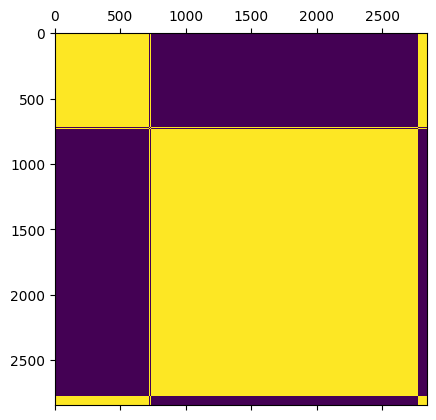

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


similarity_matrix = cosine_similarity(W)

plt.matshow(similarity_matrix)

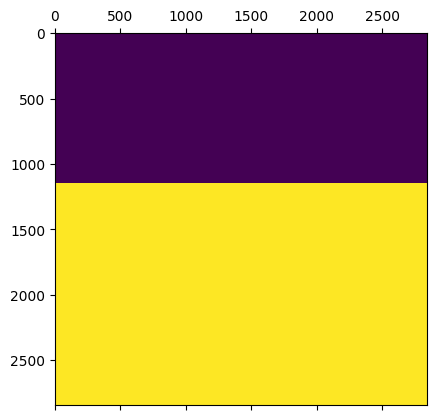

In [ ]:
## Trying to sort the matrix
similarity_matrix_flat = np.sort(similarity_matrix.flatten())
similarity_matrix_sorted = similarity_matrix_flat.reshape(similarity_matrix.shape)

plt.matshow(similarity_matrix_sorted)

In [ ]:
## Document Similarity ##

query_index = 0
similar_indices = np.argsort(similarity_matrix[query_index])[::-1]

top_n = 50
top_n_similar_documents = similar_indices[1:top_n + 1]
print(f"Top {top_n} similar documents to document {query_index}:")
for index in top_n_similar_documents:
    print(f"Document {index} - Similarity: {similarity_matrix[query_index, index]}")

Top 50 similar documents to document 0:
Document 476 - Similarity: 1.0
Document 478 - Similarity: 1.0
Document 479 - Similarity: 1.0
Document 480 - Similarity: 1.0
Document 481 - Similarity: 1.0
Document 482 - Similarity: 1.0
Document 483 - Similarity: 1.0
Document 484 - Similarity: 1.0
Document 485 - Similarity: 1.0
Document 486 - Similarity: 1.0
Document 487 - Similarity: 1.0
Document 488 - Similarity: 1.0
Document 489 - Similarity: 1.0
Document 490 - Similarity: 1.0
Document 491 - Similarity: 1.0
Document 492 - Similarity: 1.0
Document 493 - Similarity: 1.0
Document 494 - Similarity: 1.0
Document 495 - Similarity: 1.0
Document 496 - Similarity: 1.0
Document 477 - Similarity: 1.0
Document 475 - Similarity: 1.0
Document 453 - Similarity: 1.0
Document 474 - Similarity: 1.0
Document 455 - Similarity: 1.0
Document 456 - Similarity: 1.0
Document 457 - Similarity: 1.0
Document 458 - Similarity: 1.0
Document 459 - Similarity: 1.0
Document 460 - Similarity: 1.0
Document 461 - Similarity: 1.0

In [ ]:
## Clustering Documents ##

from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(W)
labels = kmeans.labels_

for i, label in enumerate(labels):
    print(f"Document/File Path {i} - Cluster: {label}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Document/File Path 0 - Cluster: 2
Document/File Path 1 - Cluster: 2
Document/File Path 2 - Cluster: 2
Document/File Path 3 - Cluster: 2
Document/File Path 4 - Cluster: 2
Document/File Path 5 - Cluster: 2
Document/File Path 6 - Cluster: 2
Document/File Path 7 - Cluster: 2
Document/File Path 8 - Cluster: 2
Document/File Path 9 - Cluster: 2
Document/File Path 10 - Cluster: 2
Document/File Path 11 - Cluster: 2
Document/File Path 12 - Cluster: 2
Document/File Path 13 - Cluster: 2
Document/File Path 14 - Cluster: 2
Document/File Path 15 - Cluster: 2
Document/File Path 16 - Cluster: 2
Document/File Path 17 - Cluster: 2
Document/File Path 18 - Cluster: 2
Document/File Path 19 - Cluster: 2
Document/File Path 20 - Cluster: 2
Document/File Path 21 - Cluster: 2
Document/File Path 22 - Cluster: 2
Document/File Path 23 - Cluster: 2
Document/File Path 24 - Cluster: 2
Document/File Path 25 - Cluster: 2
Document/File Path 26 - Cluster: 2
Document/File Path 27 - Cluster: 2
Document/File Path 28 - Cluste

In [ ]:
### Dummy File Text Extraction ###

# First cleaned to be processed by spaCy tokenization/NER

# 1. Tokens
  # - Extracted
  # - Search for specific token
  # - All tokens printable


# 2. TF-IDF Scoring
  # - All tokens scored using TF-IDF
  # - Used for giving model most important words and for NER
  # - Visualizations and NMF

# 3. NER/Entities
  # - Custom spaCy NER to find important entities
  # - Mostly for text extraction --> summarizing entities, printing lines before and after certain entities, etc.


# 4. Way to organize this all...

In [ ]:
## Dummy File Text Extraction and Tokenization ##

In [ ]:
## Cleaning Files


## My two dummy files + 3 mRNA csv files

def clean_content(file_paths2):
  cleaned_files_2 = []

  for file_path in file_paths2:
    with open(file_path, 'r') as f:
      text = f.read()

    cleaned_text_2 = text.replace('\n', '. ').replace(',', '. ')

    cleaned_files_2.append(cleaned_text_2)

  return cleaned_files_2

file_paths2 = [
    '/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_01.csv',
    '/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_02.csv',
    '/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_03.csv',
    '/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-11-27/updated_lab_file.txt',
    '/content/drive/MyDrive/20231127/Count Star/CountStar/Data/Report.txt',
]

cleaned_files = clean_content(file_paths2)

for i, text in enumerate(cleaned_files):
    print(f"Processed text for file {i + 1}:\n{text}\n")

Processed text for file 1:
Name. From [nt]. To [nt]. Corr. Area. % of Total. Color. Region 1. 467. 935. 7.1. 6. 16711680. Region 2. 917. "1. 184". 8.7. 7. 32768. Region 3. "1. 195". "1. 546". 8.6. 7. 16776960. Region 4. "1. 556". "1. 695". 8.7. 7. 16711935. Region 5. "1. 695". "2. 775". 90.9. 72. 4227327. Region 6. "2. 790". "3. 314". 0.9. 1. 0. 

Processed text for file 2:
Name. From [nt]. To [nt]. Corr. Area. % of Total. Color. Region 1. 467. 935. 7.4. 6. 16711680. Region 2. 917. "1. 184". 10.0. 7. 32768. Region 3. "1. 195". "1. 546". 9.8. 7. 16776960. Region 4. "1. 556". "1. 695". 9.5. 7. 16711935. Region 5. "1. 695". "2. 775". 95.1. 71. 4227327. Region 6. "2. 790". "3. 334". 2.2. 2. 0. 

Processed text for file 3:
Name. From [nt]. To [nt]. Corr. Area. % of Total. Color. Region 1. 467. 935. 6.8. 5. 16711680. Region 2. 917. "1. 184". 8.9. 7. 32768. Region 3. "1. 195". "1. 546". 9.0. 7. 16776960. Region 4. "1. 556". "1. 695". 9.9. 7. 16711935. Region 5. "1. 695". "2. 775". 100.5. 73. 

In [ ]:
## TF-IDF Scoring for File Content

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(stop_words=['695', '790', '775', '467', '546'])

tfidf_matrix2 = vectorizer2.fit_transform(cleaned_files)

feature_names2 = vectorizer2.get_feature_names_out()

tfidf_df2 = pd.DataFrame(tfidf_matrix2.toarray(), index=file_paths2, columns=feature_names2)
print(tfidf_df2)

                                                          01        05  \
/content/drive/MyDrive/20231127/Bioanalyzer/Dat...  0.000000  0.000000   
/content/drive/MyDrive/20231127/Bioanalyzer/Dat...  0.000000  0.000000   
/content/drive/MyDrive/20231127/Bioanalyzer/Dat...  0.000000  0.000000   
/content/drive/MyDrive/20231127/Bioanalyzer/Dat...  0.063551  0.063551   
/content/drive/MyDrive/20231127/Count Star/Coun...  0.000000  0.000000   

                                                          10       100  \
/content/drive/MyDrive/20231127/Bioanalyzer/Dat...  0.000000  0.000000   
/content/drive/MyDrive/20231127/Bioanalyzer/Dat...  0.183614  0.000000   
/content/drive/MyDrive/20231127/Bioanalyzer/Dat...  0.000000  0.152570   
/content/drive/MyDrive/20231127/Bioanalyzer/Dat...  0.000000  0.051273   
/content/drive/MyDrive/20231127/Count Star/Coun...  0.000000  0.000000   

                                                          11      1200  \
/content/drive/MyDrive/20231127/Bioa

In [ ]:
# Top Scoring Terms for File Content

sorted_terms_mean2 = tfidf_df2.mean(axis=0).sort_values(ascending=False)
print(sorted_terms_mean2.head(20))


# Low scoring and odd words due to low amount of file content presented
# 'Region' scoring very high as it is very relevant in 3 of 5 files

region      0.451515
nt          0.150505
dl          0.101682
test        0.076786
mg          0.076262
of          0.075253
32768       0.075253
4227327     0.075253
556         0.075253
917         0.075253
195         0.075253
935         0.075253
184         0.075253
16711935    0.075253
16776960    0.075253
total       0.075253
16711680    0.075253
area        0.075253
color       0.075253
corr        0.075253
dtype: float64


In [ ]:
## Making the Matrix for NMF ##


# Creating function to make file content (rows) by important words (columns) matrix
# Important words found via TF-IDF scoring from above

def create_matrix_file(file_contents, word_list_content):
    matrix = []

    word_list_content_lower = [word.lower() for word in word_list_content]

    for file_content_row in file_contents:
        row = []

        file_content_lower = file_content_row.lower()

        for word in word_list_content_lower:
            if word in file_content_lower:
                row.append(1)
            else:
                row.append(0)
        matrix.append(row)

    return matrix


words2 = ['region', 'nt', 'dl', 'test', 'mg', 'of', 'total', 'area', 'color']


result_matrix2 = create_matrix_file(cleaned_files, words2)

for row in result_matrix2:
    print(row)

[1, 1, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0]


In [ ]:
## NMF of Matrix File Content by Important Words ##

# NMF splits the original matrix R into parts W and H
# W x H should return the original matrix R (with some rounding!)
# W = how much topic is in each document
# H = which words make up each topic

from sklearn.decomposition import NMF

result_matrix_content = np.array(result_matrix2)


nmf_model_content = NMF(n_components=2, random_state = 1)

W2 = nmf_model_content.fit_transform(result_matrix_content)
H2 = nmf_model_content.components_

matrix_reform2 = np.dot(W2, H2)


#print(matrix_reform) # checking to make sure it worked, numbers very large and in scientific notation
print(np.round(matrix_reform2))

[[1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0.]]


Cosine Similarity Matrix:
[[1.         1.         1.         0.         0.08047003]
 [1.         1.         1.         0.         0.08047003]
 [1.         1.         1.         0.         0.08047003]
 [0.         0.         0.         1.         0.99675703]
 [0.08047003 0.08047003 0.08047003 0.99675703 1.        ]]


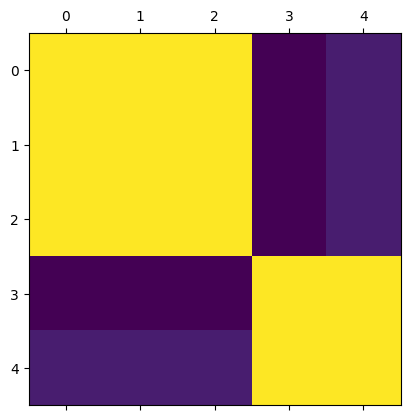

In [ ]:
## NMF Similarity Matrix File Content ##

# Uses the W matrix to calculate similarity between documents
# Each row of W represents a document and the cosine similarity between two rows (two documents) gives a measure of how similar they are topic wise

from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between vectors in W
similarity_matrix2 = cosine_similarity(W2)

print("Cosine Similarity Matrix:")
print(similarity_matrix2)

plt.matshow(similarity_matrix2)

In [ ]:
similarity_matrix2.shape

(5, 5)

In [ ]:
## Similar Documents via Cosine Matrix ##

# Finds the most similar documents based on cosine similarity matrix

query_index2 = 0
similar_indices2 = np.argsort(similarity_matrix2[query_index2])[::-1]


top_n2 = 4
top_n_similar_documents2 = similar_indices2[1:top_n2 + 1]
print(f"Top {top_n2} similar documents to document {query_index2}:")
for index in top_n_similar_documents2:
    print(f"Document {index} - Similarity: {similarity_matrix2[query_index2, index]}")

Top 4 similar documents to document 0:
Document 1 - Similarity: 1.0
Document 0 - Similarity: 1.0
Document 4 - Similarity: 0.08047003280351872
Document 3 - Similarity: 0.0


In [ ]:
## Clustering Documents ##

# Uses Kmeans clustering on the W matrix
# Finds and gives similar documents a cluster label
# Groups them by similarity of W matrix (topic matrix)



from sklearn.cluster import KMeans


kmeans2 = KMeans(n_clusters = 2, random_state = 1).fit(W2)
labels2 = kmeans2.labels_


for i, label in enumerate(labels2):
    print(f"Document {i} - Cluster: {label}")

Document 0 - Cluster: 1
Document 1 - Cluster: 1
Document 2 - Cluster: 1
Document 3 - Cluster: 0
Document 4 - Cluster: 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

## NER for File Content


nlp = spacy.load("en_core_web_md")

patterns_text = [
    {"label": "TECH_NAME", "pattern": "PERSON"},
    {"label": "INSTRUMENT", "pattern": [{"LOWER": "roche"}, {"LOWER": "cobas"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "complete"}, {"LOWER": "blood"}, {"LOWER": "count"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "white"}, {"LOWER": "blood"}, {"LOWER": "cell"}, {"LOWER": "count"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "complete"}, {"LOWER": "blood"}, {"LOWER": "count"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "hemoglobin"}, {"LOWER": "hb"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "platelet"}, {"LOWER": "count"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "glucose"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "creatinine"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "alt"}, {"LOWER": "alanine aminotransferase"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "igg"}]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "pcr"}, {"LOWER": "covid-19"},]},
    {"label": "TEST_NAME", "pattern": [{"LOWER": "vitamin d"}, {"LOWER": "level"}]},
    {"label": "INSTRUMENT", "pattern": [{"LOWER": "sysmex"}, {"LOWER": "xn"}, {"LOWER": "-3000"}]},
    {"label": "TEST_TYPE", "pattern": [{"LOWER": "immunology"}, {"LOWER": "chemistry"}]},
    {"label": "mRNA_CORR", "pattern": [{"LOWER": "corr"}]},
    {"label": "mRNA_COLOR", "pattern": [{"LOWER": "color"}]},
    {"label": "mRNA_REGION", "pattern": [{"LOWER": "region"}]},
    {"label": "mRNA_AREA", "pattern": [{"LOWER": "area"}]},
    {"label": "mRNA_TOTAL", "pattern": [{"LOWER": "total"}]},
    {"label": "DATA_MEASUREMENT", "pattern": [{"LOWER": "dl"}]},
    {"label": "DATA_MEASUREMENT", "pattern": [{"LOWER": "mg"}]},
    {"label": "mRNA_DATA", "pattern": [{"LOWER": "nt"}]},
    ]



ruler = nlp.add_pipe("entity_ruler", before="ner")

ruler.add_patterns(patterns_text)

In [ ]:
doc = nlp(mrna1)

for ent in doc.ents:
    if ent.label_ == "mRNA_REGION":
        # Extract region name and number based on the position of the entity
        region_start = max(ent.start_char - 10, 0)  # Adjust the window size as needed
        region_info = mrna1[region_start:ent.end_char + 10]
        print(f"Region: {region_info}")

    elif ent.label_ == "DATA_MEASUREMENT":
        # Extract measurement value based on the position of the entity
        value_start = max(ent.start_char - 10, 0)  # Adjust the window size as needed
        value_info = mrna1[value_start:ent.end_char + 10]
        print(f"Measurement Value: {value_info}")

Region: tal,Color
Region 1,467,935
Region: ,16711680
Region 2,917,"1,
Region: 7,7,32768
Region 3,"1,195"
Region: ,16776960
Region 4,"1,556"
Region: ,16711935
Region 5,"1,695"
Region: 2,4227327
Region 6,"2,790"


In [ ]:
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: nt],Corr, Label: ORG
Entity: Total, Label: mRNA_TOTAL
Entity: Color, Label: mRNA_COLOR
Entity: Region, Label: mRNA_REGION
Entity: Region, Label: mRNA_REGION
Entity: Region, Label: mRNA_REGION
Entity: Region, Label: mRNA_REGION
Entity: Region, Label: mRNA_REGION
Entity: Region, Label: mRNA_REGION


In [ ]:
with open("/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-11-27/updated_lab_file.txt", "r") as f:
  text = f.read()


text_no_line = text.replace('\n', '. ')

print(text_no_line)

Patient: John Doe. DOB: 1980-05-15. Test Date: 2023-01-20. . Laboratory Test Results:. . Test Name, Result, Reference Range. Complete Blood Count (CBC), . White Blood Cell Count (WBC), 7.2 x10^3/µL, 4.0 - 11.0 x10^3/µL. Hemoglobin (Hb), 14.5 g/dL, 13.5 - 17.5 g/dL. Platelet Count, 250 x10^3/µL, 150 - 450 x10^3/µL. . Chemistry Panel:. Glucose, 90 mg/dL, 70 - 100 mg/dL. Creatinine, 1.0 mg/dL, 0.6 - 1.3 mg/dL. ALT (Alanine Aminotransferase), 25 U/L, 7 - 56 U/L. . Immunology:. IgG, 1200 mg/dL, 700 - 1600 mg/dL. . Specialized Tests:. PCR Test for COVID-19, Negative. Vitamin D Level, 30 ng/mL, 20 - 50 ng/mL. . Lab Machines Used:. 1. Sysmex XN-3000. 2. Roche Cobas e411. . Note: Patient denies any recent travel or exposure to sick individuals.. . Physician: Dr. Jane Smith. Contact: dr.jane.smith@example.com


In [ ]:
doc = nlp(text_no_line)

for ent in doc.ents:
  print (ent.text, ent.label_)

In [ ]:
file_ner_path1 = '/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_01.csv'
file_ner_path2 = '/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_02.csv'
file_ner_path3 = '/content/drive/MyDrive/20231127/Bioanalyzer/Data/2023-07-25/mRNA_03.csv'

In [ ]:
print(mrna1)

Name,From [nt],To [nt],Corr. Area,% of Total,Color
Region 1,467,935,7.1,6,16711680
Region 2,917,"1,184",8.7,7,32768
Region 3,"1,195","1,546",8.6,7,16776960
Region 4,"1,556","1,695",8.7,7,16711935
Region 5,"1,695","2,775",90.9,72,4227327
Region 6,"2,790","3,314",0.9,1,0



In [ ]:
# mRNA 1 csv File

with open(file_ner_path1, "r") as i:
    mrna1 = i.read()

sentences1 = []
for row in mrna1.splitlines():
    sentence = ". ".join(row.split(','))
    sentences1.append(sentence)

result_string = " ".join(sentences1)

print(result_string)

Name. From [nt]. To [nt]. Corr. Area. % of Total. Color Region 1. 467. 935. 7.1. 6. 16711680 Region 2. 917. "1. 184". 8.7. 7. 32768 Region 3. "1. 195". "1. 546". 8.6. 7. 16776960 Region 4. "1. 556". "1. 695". 8.7. 7. 16711935 Region 5. "1. 695". "2. 775". 90.9. 72. 4227327 Region 6. "2. 790". "3. 314". 0.9. 1. 0


In [ ]:
# NER for mRNA File 1

doc_test = nlp(result_string)


for ent in doc_test.ents:
  print(ent.text, ent.label_)

In [ ]:
# Matcher for mRNA File 1

In [ ]:
## CSV File Processing Test ##

#nlp = spacy.load("en_core_web_md")

#doctest1 = nlp(mrna1)

#for token in doctest1:
  print(token)

## unprocessed tokens from csv format data

In [ ]:
#doctest2 = nlp(result_string)

#for token in doctest2:
  print(token)

## processed format of csv data
## needs to be fixed so it retains the csv structure and the data retains it's relation

## Using chatgpt API for RAG

#### Using openai chatgpt-3.5 turbo to do RAG to prompt the model to answer questions related to this project
1. Implement the API in code into this notebook
2. Figure out what data needs to be used for RAG from the above code - Limited to ~2k tokens
3. Test prompting on free version before testing here
4. Prompt Engineering

## OpenAI API Framework

In [ ]:
#!pip install openai

In [ ]:
## Testing OpenAI API Key + API Call ##

from openai import OpenAI

os.environ["OPENAI_API_KEY"] = "API KEY"

client = OpenAI()


response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful assistant in a research laboratory setting. You are helping assist users who are asking questions involving lab file pathways, extracting important from them, and general questions."},
        {"role": "user", "content": "The following words had the highest TF-IDF score in the file pathways: akta, avant150, bioanalyzer, biotek, hplc_patfix, eblot, avant25, waters, countstar, empower, avant, facs. The words with highest TF-IDF score for the file content are 'region', 'nt', 'dl', 'test', 'mg', 'of', 'total', 'area', 'color', all related to testing of mRNA. You have knowledge of the words and their functions in regards to a laboratory setting."},
        {"role": "assistant", "content": "Hello! I'm here to assist you with any questions related to this directory. How can I help you today?"},
        {"role": "user", "content": "Given this file pathway: '/20231127/BIOTEK/Temp-Ver#20231114120015/JETADOB.tmp' extract and summarize relevant information about it."},
    ]
)

print(response.choices[0].message.content)



## check how many tokens I have left to use ##

## UI widget for API key

Based on the file pathway '/20231127/BIOTEK/Temp-Ver#20231114120015/JETADOB.tmp', we can extract and summarize the following relevant information:

- Date: The file pathway starts with '/20231127/', indicating that this file is associated with the date November 27, 2023.

- Instrument/Equipment: The pathway contains 'BIOTEK', suggesting that this file is related to the BIOTEK instrument or equipment in the laboratory.

- Temp-Ver: The pathway includes 'Temp-Ver#20231114120015', which could indicate a temporary version or version control information associated with this file.

- File Name: The file name itself is 'JETADOB.tmp', which does not provide much information about the file content or purpose. The '.tmp' extension often suggests that it is a temporary file.

Please note that this summary is based solely on the information present in the file pathway. For more specific details about the file's content and purpose, it would be necessary to access and examine the actual file.


### Reponse from first API Prompt:

Based on the given file pathway '/20231127/BIOTEK/Temp-Ver#20231114120015/JETADOB.tmp', here is the relevant information that can be extracted and summarized:

- Date: The directory '20231127' suggests that it belongs to November 27, 2023.
- Instrument: The directory 'BIOTEK' indicates that it is related to the BIOTEK instrument.
- Temp-Ver: The directory 'Temp-Ver#20231114120015' suggests a temporary version or temporary file associated with the specific date and time '20231114120015'.
- File name: The file 'JETADOB.tmp' is the specific file being referred to in this pathway.

Overall, this file pathway seems to indicate a temporary file named 'JETADOB.tmp' associated with the BIOTEK instrument on November 27, 2023, at the specified temporary version or time stamp '20231114120015'.

In [ ]:
## Prompt Engineering ##

# Tested on free web version of chatgpt


# Different Prompts used:

# 1. "You are a helpful assistant in a research laboratory setting. You are well-versed in laboratory research and instrument usage."

# 2. "You are a helpful assistant in a research laboratory setting. You are helping assist users who are asking questions involving lab file pathways, extracting important from them, and general questions."


# RAG Prompts:

# 1. "The following words had the highest TF-IDF score in the file pathways: akta, avant150, bioanalyzer, biotek, hplc_patfix, eblot, avant25, waters, countstar, empower, avant, facs. You have knowledge of the words and their functions in regards to a laboratory setting."

In [ ]:
### Future Work ###

# 1. Implement all this into a UI similar to file explore
  # - have a way to search via token or entity
  # - include fuzzy matching for tokens/entities
  # - have a way to search semantically for text extraction
  # - have a way to search for similar words using word vector similarity

# 2. Custom Model Training for NER

# 3. Custom Word Vector Model for Uncommon Words/Terms